<a href="https://colab.research.google.com/github/kavyasree0801/UMBC-DATA609-FALL24-WANG/blob/main/Mini_project/mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 10 - Mini Project

Comparing the economy and wealth of G7 countries and BRICS countries.

Use http://g7brics.streamlit.app as the reference.

Make sure your check your calculation, aggregation, and visualization with the reference site for correctness.

For visualization, pay attention to details - color, label, information display.

## Step 1 - Import Python libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


## Step 2 - Load the input dataset

Download the individaul countries data from the reference site and upload it to your GitHub folder. Load the dataset directly from your GitHub.

In [2]:
url = 'https://raw.githubusercontent.com/kavyasree0801/UMBC-DATA609-FALL24-WANG/refs/heads/main/Mini_project/2024-11-20T17-16_export.csv'
df = pd.read_csv(url)

## Step 3 - Explore the input dataset

- Display number of rows and columns
- Dispaly at first 5 rows, last 5 rows, and random 5 rows.
- Display information about the dataset
- For all numerical variables, display their summary statistics
- For all categorical variables, display their number of categories and most frequent category
- Find out how many countries each region has.
- Display all countries that are Latin American & Caribbean.
- Find out how many countries each income level has.
- Display all countries that are of high income.


In [3]:
# Display dataset dimensions
print("Rows and Columns:", df.shape)

# Display rows
print("First 5 Rows:\n", df.head())
print("Last 5 Rows:\n", df.tail())
print("Random 5 Rows:\n", df.sample(5))

# Dataset info and summary statistics
print("Dataset Info:")
print(df.info())

print("Summary Statistics for Numerical Variables:\n", df.describe())

# Categorical Variables
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"Category Count and Mode for {col}:")
    print(df[col].value_counts())
    print("Most Frequent Category:", df[col].mode()[0])

# Count by Region
region_counts = df['Region'].value_counts()
print("Number of countries in each region:\n", region_counts)

print("\nCountries in Latin America & Caribbean:")
print(df[df['Region'] == 'Latin America & Caribbean ']['Country Name'].unique())

# Count by Income Level
income_counts = df['Income Group'].value_counts()
print("Number of countries in each income group:\n", income_counts)

# High-income countries
high_income = df[df['Income Group'] == 'High income']
print("High-income countries:\n", high_income)


Rows and Columns: (5208, 17)
First 5 Rows:
    Unnamed: 0  Year Country Code Country Name                      Region  \
0           0  2000          ABW        Aruba  Latin America & Caribbean    
1           1  2000          AFG  Afghanistan                  South Asia   
2           2  2000          AGO       Angola         Sub-Saharan Africa    
3           3  2000          ALB      Albania       Europe & Central Asia   
4           4  2000          AND      Andorra       Europe & Central Asia   

          Income Group    Lending Type  Military Expenditure ($Millions)  \
0          High income  Not classified                               NaN   
1           Low income             IDA                               NaN   
2  Lower middle income            IBRD                        583.621334   
3  Upper middle income            IBRD                         45.362503   
4          High income  Not classified                               NaN   

   Military Expenditure (% of GDP)  

## Step 4 - Categorize Each Country

Create a new column "Group". If a country is one of the seven G7 countried, the value of "Group" would be "G7", if a country of one of the five BRICS countries, the value of "Group" would be "BRICS". Otherwise, the value of "Group" would be "REST of WORLD".

In [4]:
def categorize_group(country):
    g7 = ['United States', 'Canada', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom']
    brics = ['Brazil', 'Russian Federation', 'India', 'China', 'South Africa']
    if country in g7:
        return 'G7'
    elif country in brics:
        return 'BRICS'
    else:
        return 'REST of WORLD'

df['Group'] = df['Country Name'].apply(categorize_group)
print(df[['Country Name', 'Group']])


      Country Name          Group
0            Aruba  REST of WORLD
1      Afghanistan  REST of WORLD
2           Angola  REST of WORLD
3          Albania  REST of WORLD
4          Andorra  REST of WORLD
...            ...            ...
5203        Kosovo  REST of WORLD
5204   Yemen, Rep.  REST of WORLD
5205  South Africa          BRICS
5206        Zambia  REST of WORLD
5207      Zimbabwe  REST of WORLD

[5208 rows x 2 columns]


## Step 5 - Aggregate Data

Aggregate the following columns at the "Group" level for each year:

- For GDP, using "sum" for aggregation.
- For GDP Per Capita, use "mean" for aggregation.
- Check your calculation with the reference site.

In [5]:
grouped = df.groupby(['Group', 'Year']).agg(
    Total_GDP=('GDP ($Billions)', 'sum'),
    Avg_GDP_Per_Capita=('GDP Per Capita ($)', 'mean')
).reset_index()
print(grouped)


            Group  Year     Total_GDP  Avg_GDP_Per_Capita
0           BRICS  2000   2746.638305         2028.292589
1           BRICS  2001   2826.856648         1922.616561
2           BRICS  2002   2969.850120         1905.605611
3           BRICS  2003   3453.581362         2391.987818
4           BRICS  2004   4180.612522         3025.328901
..            ...   ...           ...                 ...
67  REST of WORLD  2019  26045.999844        18391.941837
68  REST of WORLD  2020  24726.381011        16985.707021
69  REST of WORLD  2021  28152.187200        19627.818962
70  REST of WORLD  2022  29865.703802        19716.647961
71  REST of WORLD  2023  31028.342314        16333.693541

[72 rows x 4 columns]


## Step 6 - Calculate Percentage Share of GDP

For each year, calculate the percentage share of each group's GDP. Check your calculation with the reference site.

In [6]:
grouped['GDP_Share_Percentage'] = grouped.groupby('Year')['Total_GDP'].transform(lambda x: (x / x.sum()) * 100)
print(grouped)


            Group  Year     Total_GDP  Avg_GDP_Per_Capita  \
0           BRICS  2000   2746.638305         2028.292589   
1           BRICS  2001   2826.856648         1922.616561   
2           BRICS  2002   2969.850120         1905.605611   
3           BRICS  2003   3453.581362         2391.987818   
4           BRICS  2004   4180.612522         3025.328901   
..            ...   ...           ...                 ...   
67  REST of WORLD  2019  26045.999844        18391.941837   
68  REST of WORLD  2020  24726.381011        16985.707021   
69  REST of WORLD  2021  28152.187200        19627.818962   
70  REST of WORLD  2022  29865.703802        19716.647961   
71  REST of WORLD  2023  31028.342314        16333.693541   

    GDP_Share_Percentage  
0               8.204132  
1               8.489507  
2               8.586325  
3               8.898699  
4               9.557570  
..                   ...  
67             29.944409  
68             29.240850  
69             29.250715

## Step 7 - Plot the GDP Percentage Share Over Time

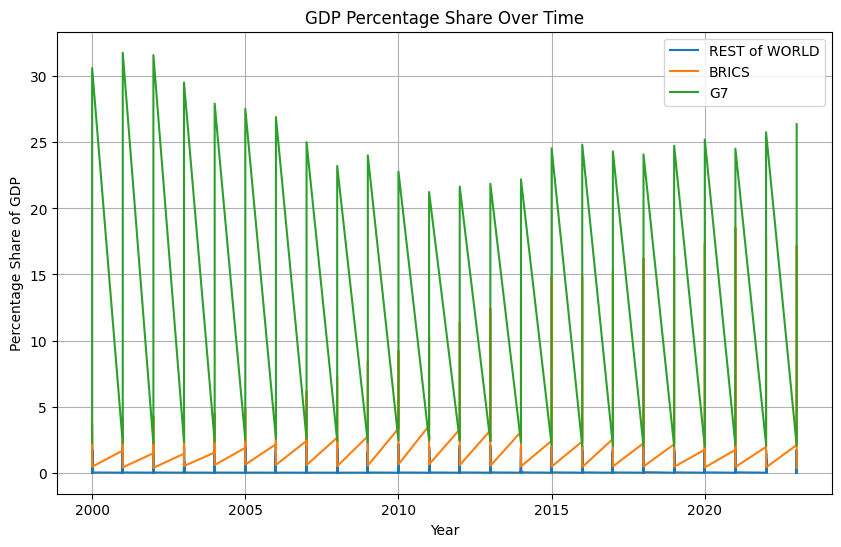

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate GDP Share Percentage
df['GDP_Share_Percentage'] = df.groupby('Year')['GDP ($Billions)'].transform(lambda x: (x / x.sum()) * 100)

# Plot
plt.figure(figsize=(10, 6))
for group in df['Group'].unique():
    subset = df[df['Group'] == group]
    plt.plot(subset['Year'], subset['GDP_Share_Percentage'], label=group)

plt.title("GDP Percentage Share Over Time")
plt.xlabel("Year")
plt.ylabel("Percentage Share of GDP")
plt.legend()
plt.grid()
plt.show()


## Step 8 - Plot the Total GDP Over Time

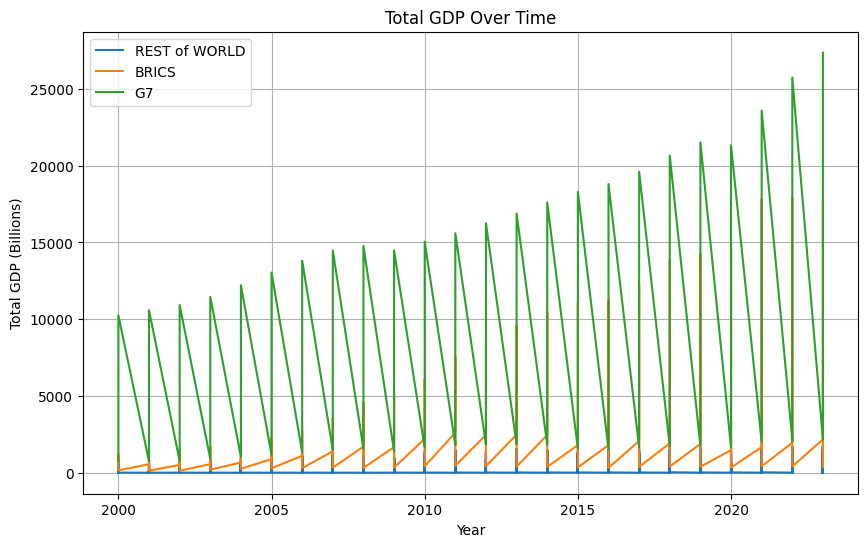

In [8]:
plt.figure(figsize=(10, 6))
for group in df['Group'].unique():
    subset = df[df['Group'] == group]
    plt.plot(subset['Year'], subset['GDP ($Billions)'], label=group)

plt.title("Total GDP Over Time")
plt.xlabel("Year")
plt.ylabel("Total GDP (Billions)")
plt.legend()
plt.grid()
plt.show()


## Step 9 - Plot the 2023 GDP Pie Chart

Each group is a slice of a pie. Make sure the following information is displayed for each slice:

- Group Name
- GDP Percentage Share
- GDP Total

In [9]:
import plotly.express as px

# Filter for 2023
df_2023 = df[df['Year'] == 2023]

fig = px.pie(
    df_2023,
    names='Group',
    values='GDP ($Billions)',
    title='2023 GDP Share by Group',
    hover_data=['GDP_Share_Percentage']
)
fig.show()


## Step 10 - Plot the 2023 GDP Pie Charts

One pie chart for G7 and one pie chart for BRICK. Each country is a slice of a pie. Make sure the following information is displayed for each slice:

- Country Name
- GDP Percentage Share
- GDP Total

In [10]:
# G7 Pie Chart
g7_2023 = df_2023[df_2023['Group'] == 'G7']
fig_g7 = px.pie(
    g7_2023,
    names='Country Name',
    values='GDP ($Billions)',
    title='2023 GDP Share - G7',
    hover_data=['GDP_Share_Percentage']
)
fig_g7.show()

# BRICS Pie Chart
brics_2023 = df_2023[df_2023['Group'] == 'BRICS']
fig_brics = px.pie(
    brics_2023,
    names='Country Name',
    values='GDP ($Billions)',
    title='2023 GDP Share - BRICS',
    hover_data=['GDP_Share_Percentage']
)
fig_brics.show()


## Step 11 - Plot the 2023 GDP Sun Burst Chart

Showing the hierarchy of Group and Country.

In [11]:
fig = px.sunburst(
    df_2023,
    path=['Group', 'Country Name'],
    values='GDP ($Billions)',
    title='2023 GDP Sunburst Chart'
)
fig.show()


## Step 12 - Plot the 2023 GDP Tree Map Chart

Showing the hierarchy of Group and Country.

In [12]:
fig = px.treemap(
    df_2023,
    path=['Group', 'Country Name'],
    values='GDP ($Billions)',
    title='2023 GDP Tree Map Chart'
)
fig.show()


## Step 13 - Plot the Historic Trend of GDP Per Capita

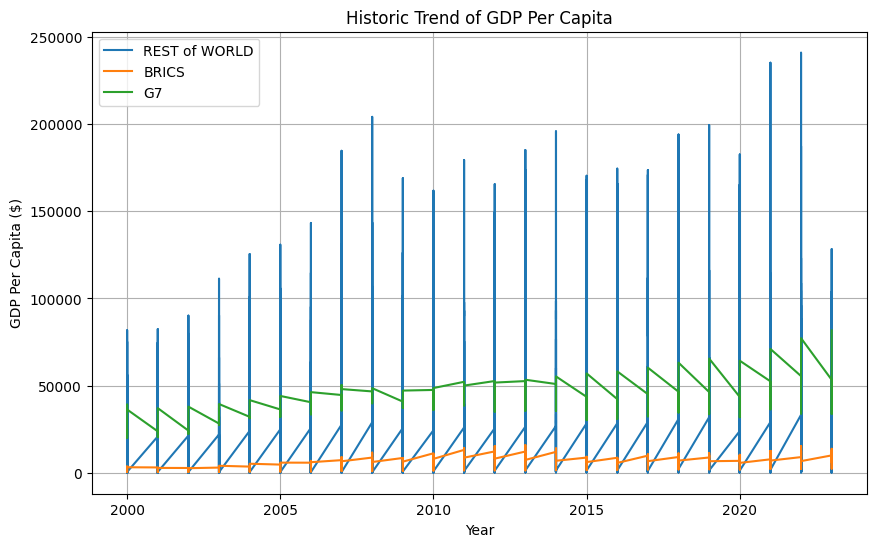

In [13]:
plt.figure(figsize=(10, 6))
for group in df['Group'].unique():
    subset = df[df['Group'] == group]
    plt.plot(subset['Year'], subset['GDP Per Capita ($)'], label=group)

plt.title("Historic Trend of GDP Per Capita")
plt.xlabel("Year")
plt.ylabel("GDP Per Capita ($)")
plt.legend()
plt.grid()
plt.show()


## Step 14 - Plot the 2023 GDP Per Capita Bar Chart

Each group is a bar.

In [14]:
fig = px.bar(
    df_2023,
    x='Group',
    y='GDP Per Capita ($)',
    title='2023 GDP Per Capita by Group',
    color='Group'
)
fig.show()


## Step 15 - Plot the 2023 GDP Per Capita Bar Chart of G7 and BRICS countries

Each country is a bar. Differentiate group by color.

In [15]:
subset = df_2023[df_2023['Group'].isin(['G7', 'BRICS'])]

fig = px.bar(
    subset,
    x='Country Name',
    y='GDP Per Capita ($)',
    color='Group',
    title='2023 GDP Per Capita by Country (G7 and BRICS)',
    text='GDP Per Capita ($)'
)
fig.show()


## Step 16 - Create a Choropleth

To show G7 countries and BRICS countries and use color code to differentiate the two broups.

In [16]:
fig = px.choropleth(
    df[df['Group'].isin(['G7', 'BRICS'])],
    locations='Country Code',
    color='Group',
    title='Choropleth of G7 and BRICS Countries',
    hover_name='Country Name'
)
fig.show()
